<a href="https://colab.research.google.com/github/Baldorpau07/Ejercicios-PYTHON/blob/main/M%C3%ADnimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1.85 2.72 2.81 3.06 3.42 3.76 4.31 4.47 4.64 4.99]
[2.26 3.1  3.8  4.11 4.74 4.31 5.24 4.03 5.69 6.57]
1.1091488253986432 0.38873678208868867
Coeficiente de variación: 13.668568154618429
Error relativo: [ 7.99389863  9.85876088  7.75144786  7.96272049 11.77160833  5.78042612
  1.35175154 32.67077002  2.72078503  9.84186574]
Media: 4.385
Varianza: 0.3592404573477115
Desviación estándar: 0.5993667135800181


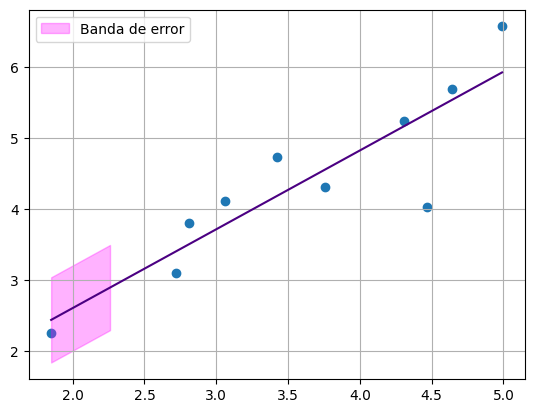

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
url = "https://raw.githubusercontent.com/mike1502/THC/main/Python/Aplicaciones/MinimosCuadrados/MinimosCuadrados.csv"
df = pd.read_csv(url)  # si usas ; como separador: pd.read_csv(url, delimiter=";")
x = df["x"].to_numpy()
y = df["y"].to_numpy()
print(x)
print(y)

n=len(x)
suma_x=np.sum(x)
sum_y=np.sum(y)
sum_xy=np.sum(x*y)
sum_x2=np.sum(x**2)
m=(n*sum_xy-suma_x*sum_y)/(n*sum_x2-suma_x**2)
b=(sum_y-m*suma_x)/n
print(m,b)
y_model=m*x+b

res=y-y_model
er=np.abs(res/y)*100
media=np.mean(y)
var=np.sum(res**2)/(n-2)
de=np.sqrt(var)
cv=(de/media)*100
print("Coeficiente de variación:",cv)
print("Error relativo:",er)
print("Media:",media)
print("Varianza:",var)
print("Desviación estándar:",de)

xline=np.linspace(min(x),min(y),100)
yline=m*(xline)+b
plt.scatter(x,y)
plt.plot(x,y_model,color='indigo')


lin_sup=yline+de
lin_inf=yline-de
plt.fill_between(xline,lin_inf,lin_sup,color='magenta',alpha=0.3,label="Banda de error")
plt.grid()
plt.legend()
plt.show()

In [87]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/mike1502/THC/main/Python/Aplicaciones/MinimosCuadrados/MinimosCuadrados.csv"
df = pd.read_csv(url)  # si usas ; como separador: pd.read_csv(url, delimiter=";")
x = df["x"].to_numpy()
y = df["y"].to_numpy()

x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)

poly = PolynomialFeatures(degree=3, include_bias=True)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

c = model.intercept_[0]
a,b,d=model.coef_[3],model.coef_[2],model.coef_[1],
print(c,a,b,d)

x_fit = np.linspace(min(x), max(x), 300)
x_fit_poly = poly.transform(x_fit)

y_final = model.predict(x_fit_poly)

plt.plot(x, y, 'o')
plt.plot(x_fit, y_final, color='red')
plt.grid()
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 1